# Evaluating Majority Voting Approach

## Operations

### Read standard concepts

In [4]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
operationsDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Procedure') & (athenaDf.concept_class_id == 'Procedure')]
operationsDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254913,42534812,Ultrasonography of calf of right lower leg,Procedure,SNOMED,Procedure,S,1001000087107,20180131,20991231,NaN
2254926,42534815,Right fluoroscopic retrograde pyelography,Procedure,SNOMED,Procedure,S,101000087107,20180131,20991231,NaN
2254929,37108565,Ultrasonography of left elbow,Procedure,SNOMED,Procedure,S,1011000087109,20170731,20991231,NaN
2254947,37108566,Ultrasonography of right elbow,Procedure,SNOMED,Procedure,S,1021000087101,20170731,20991231,NaN
2254970,37117086,Ultrasonography of left foot,Procedure,SNOMED,Procedure,S,1031000087104,20170731,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271637,3663244,Esophagogastroduodenoscopy gastric outlet redu...,Procedure,SNOMED,Procedure,S,870424001,20200731,20991231,NaN
3271638,3663245,Quantitative electroencephalogram,Procedure,SNOMED,Procedure,S,870425000,20200731,20991231,NaN
3271639,3663246,Angioplasty using paclitaxel coated balloon ca...,Procedure,SNOMED,Procedure,S,870426004,20200731,20991231,NaN
3271660,3663267,Sequential anastomosis of free right internal ...,Procedure,SNOMED,Procedure,S,871498004,20200731,20991231,NaN


### Read operations file

In [5]:
import pandas as pd

sourceOperationsDf = pd.read_csv('data/20004_operation.csv', dtype=str)
sourceOperationsDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20004,scan / x-ray,1603,NaN,NaN,332,NaN,0.654131293296814,UNCHECKED,NaN,0,4178367,VALUE,NaN,NaN,1603436039043
1,20004,exercise ecg,1599,NaN,NaN,150,NaN,1.0,APPROVED,NaN,0,4261794,VALUE,NaN,NaN,1603436039045
2,20004,liver surgery,1450,NaN,NaN,435,NaN,0.7727025747299194,APPROVED,NaN,0,4171687,VALUE,NaN,NaN,1603436039047
3,20004,lymph node surgery,1537,NaN,NaN,1537,NaN,0.6767706274986267,APPROVED,NaN,0,4194197,VALUE,NaN,NaN,1603436039049
4,20004,bone marrow biopsy,1615,NaN,NaN,116,NaN,1.0,APPROVED,NaN,0,4120443,VALUE,NaN,NaN,1603436039051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,20004,pancreatic transplant,1457,NaN,NaN,7,NaN,1.0,APPROVED,NaN,0,4266668,VALUE,NaN,NaN,1603436039260
250,20004,amputation of toe,1442,NaN,NaN,506,NaN,1.0,APPROVED,NaN,0,4159766,VALUE,NaN,NaN,1603436039260
251,20004,amputation of leg,1440,NaN,NaN,240,NaN,1.0,APPROVED,NaN,0,4219032,VALUE,NaN,NaN,1603436039261
252,20004,endometrial ablation,1360,NaN,NaN,2851,NaN,1.0,APPROVED,NaN,0,4141940,VALUE,NaN,NaN,1603436039262


### Read mapped operations file

In [6]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp/'
mappedOperationsDf = pd.read_csv(baseDir + '20004_operation_mapped.csv')
mappedOperationsDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence,id
0,0,scan / x-ray,NaN,Mandible dual energy X-ray photon absorptiomet...,Dual energy X-ray absorptiometry scan of wrist,NaN,Low,1603
1,1,scan / x-ray,NaN,Mandible dual energy X-ray photon absorptiomet...,Dual energy X-ray absorptiometry scan of wrist,Mandible dual energy X-ray photon absorptiomet...,Low,1603
2,2,scan / x-ray,NaN,Mandible dual energy X-ray photon absorptiomet...,Dual energy X-ray absorptiometry scan of wrist,Dual energy X-ray absorptiometry scan of wrist,Low,1603
3,3,exercise ecg,NaN,Hypertension exercise education,NaN,NaN,Medium,1599
4,4,exercise ecg,NaN,Hypertension exercise education,NaN,Hypertension exercise education,Low,1599
...,...,...,...,...,...,...,...,...
550,550,amputation of leg,Amputation,Amputation of leg NOS,Amputation of leg,Amputation of leg,Low,1440
551,551,endometrial ablation,Endometrial Ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Medium,1360
552,552,endometrial ablation,Endometrial Ablation,Endometrial ablation,Endometrial ablation,Endometrial Ablation,Low,1360
553,553,heart transplant,NaN,Heart transplant,Heart transplant,Heart transplant,Medium,1098


### Analyse mapped operations file

In [7]:
mappedOperationsDf.confidence.value_counts()

Low       353
Medium    200
High        2
Name: confidence, dtype: int64

In [8]:
mappedOperationsDf[mappedOperationsDf.confidence.isin(['Medium', 'High'])]

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence,id
3,3,exercise ecg,NaN,Hypertension exercise education,NaN,NaN,Medium,1599
5,5,liver surgery,NaN,Laser surgery,NaN,NaN,Medium,1450
7,7,lymph node surgery,NaN,Lymph node graft,NaN,NaN,Medium,1537
9,9,bone marrow biopsy,Biopsy,Bone marrow biopsy (& non-surgical),Bone marrow biopsy (& non-surgical),Bone marrow biopsy (& non-surgical),Medium,1615
11,11,duodenal surgery,NaN,Optional surgery,NaN,NaN,Medium,1529
...,...,...,...,...,...,...,...,...
539,539,cardioversion,Cardioversion,Internal cardioversion using fluoroscopic guid...,Cardioversion,Cardioversion,Medium,1524
544,544,pancreatic transplant,NaN,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant,Medium,1457
546,546,amputation of toe,Amputation Of Toe,Amputation of toe,Amputation of toe,Amputation of toe,Medium,1442
551,551,endometrial ablation,Endometrial Ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Medium,1360


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

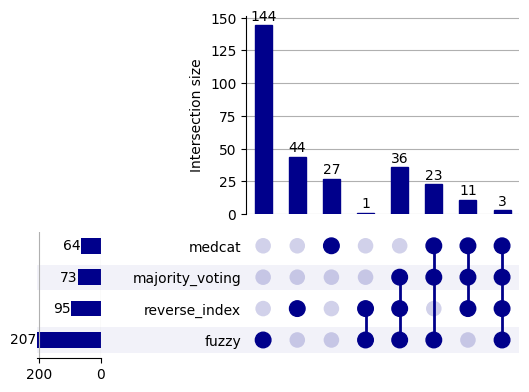

In [9]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedOperationsDf.medcatConcept)
mappedIdsFuzzy = set(mappedOperationsDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedOperationsDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedOperationsDf[mappedOperationsDf.confidence.isin(['Medium', 'High'])].majorityVoting)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Create final dataframe

In [65]:
mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['id'])['id', 'medcatConcept'].agg(['unique'])
mappedOperationsMedcatDf.reset_index(drop = True, inplace = True)
mappedOperationsMedcatDf.columns = mappedOperationsMedcatDf.columns.droplevel(1)
mappedOperationsMedcatDf.medcatConcept = mappedOperationsMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedOperationsMedcatDf.id = mappedOperationsMedcatDf.id.apply(lambda x: str(x[0]))
mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['id'])['id', 'fuzzyConcept'].agg(['unique'])
mappedOperationsFuzzyDf.reset_index(drop = True, inplace = True)
mappedOperationsFuzzyDf.columns = mappedOperationsFuzzyDf.columns.droplevel(1)
mappedOperationsFuzzyDf.fuzzyConcept = mappedOperationsFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedOperationsFuzzyDf.id = mappedOperationsFuzzyDf.id.apply(lambda x: str(x[0]))
mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['id'])['id', 'reverseIndexConcept'].agg(['unique'])
mappedOperationsReverseIndexDf.reset_index(drop = True, inplace = True)
mappedOperationsReverseIndexDf.columns = mappedOperationsReverseIndexDf.columns.droplevel(1)
mappedOperationsReverseIndexDf.reverseIndexConcept = mappedOperationsReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedOperationsReverseIndexDf.id = mappedOperationsReverseIndexDf.id.apply(lambda x: str(x[0]))
mappedOperationsMajorityVotingDf = mappedOperationsDf[mappedOperationsDf.majorityVoting.notna() & mappedOperationsDf.confidence.isin(['Medium', 'High'])].groupby(['id'])['id', 'majorityVoting'].agg(['unique'])
mappedOperationsMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedOperationsMajorityVotingDf.columns = mappedOperationsMajorityVotingDf.columns.droplevel(1)
mappedOperationsMajorityVotingDf.majorityVoting = mappedOperationsMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedOperationsMajorityVotingDf.id = mappedOperationsMajorityVotingDf.id.apply(lambda x: str(x[0]))

/tmp/ipykernel_3343692/777462529.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['id'])['id', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_3343692/777462529.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['id'])['id', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_3343692/777462529.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['id'])['id', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_3343692/777462529.py:16: FutureWarning: In

In [66]:
mappedOperationsCuratedDf = sourceOperationsDf\
    .merge(operationsDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceValueCode', 'concept_name']]
mappedOperationsCuratedDf = mappedOperationsCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedOperationsCuratedDf

,sourceValueCode,curatedConcept
0,1603,Radiographic imaging procedure
1,1599,Electrocardiogram with exercise test
2,1450,Operation on liver
3,1537,Operation on lymph node
4,1615,Bone marrow sampling
...,...,...
249,1457,Transplantation of pancreas
250,1442,Amputation of toe
251,1440,Amputation of lower limb
252,1360,Endometrial ablation


In [67]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedOperationsFinalDf = mappedOperationsCuratedDf\
    .merge(mappedOperationsMedcatDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])\
        .merge(mappedOperationsFuzzyDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])\
            .merge(mappedOperationsReverseIndexDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])\
                .merge(mappedOperationsMajorityVotingDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])
mappedOperationsFinalDf

,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,1603,Radiographic imaging procedure,NaN,Mandible dual energy X-ray photon absorptiomet...,Dual energy X-ray absorptiometry scan of wrist,NaN
1,1599,Electrocardiogram with exercise test,NaN,Hypertension exercise education,NaN,NaN
2,1450,Operation on liver,NaN,Laser surgery,NaN,NaN
3,1537,Operation on lymph node,NaN,Lymph node graft,NaN,NaN
4,1615,Bone marrow sampling,Biopsy,Bone marrow biopsy (& non-surgical),Bone marrow biopsy (& non-surgical),Bone marrow biopsy (& non-surgical)
...,...,...,...,...,...,...
249,1457,Transplantation of pancreas,NaN,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant
250,1442,Amputation of toe,Amputation Of Toe,Amputation of toe,Amputation of toe,Amputation of toe
251,1440,Amputation of lower limb,Amputation,Amputation of leg NOS,Amputation of leg,NaN
252,1360,Endometrial ablation,Endometrial Ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation


### Plot the output of all the mapping strategies

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

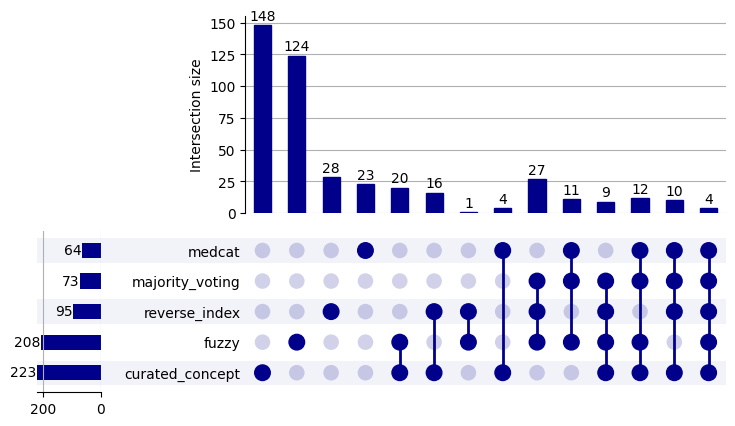

In [68]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedOperationsFinalDf.medcatConcept)
mappedIdsFuzzy = set(mappedOperationsFinalDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedOperationsFinalDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedOperationsFinalDf.majorityVoting)
mappedIdsCurated = set(mappedOperationsFinalDf.curatedConcept)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        , 'curated_concept': mappedIdsCurated
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Calculate matching and not matching percentages

In [112]:
matchingMedcatPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.medcatConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
matchingFuzzyPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.fuzzyConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
matchingReverseIndexPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.reverseIndexConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
matchingmajorityVotingPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.majorityVoting].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingMedcatPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.medcatConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingFuzzyPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.fuzzyConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.fuzzyConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingReverseIndexPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.reverseIndexConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)
notMatchingmajorityVotingPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.majorityVoting.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.majorityVoting)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2)

### Plot matching percentages

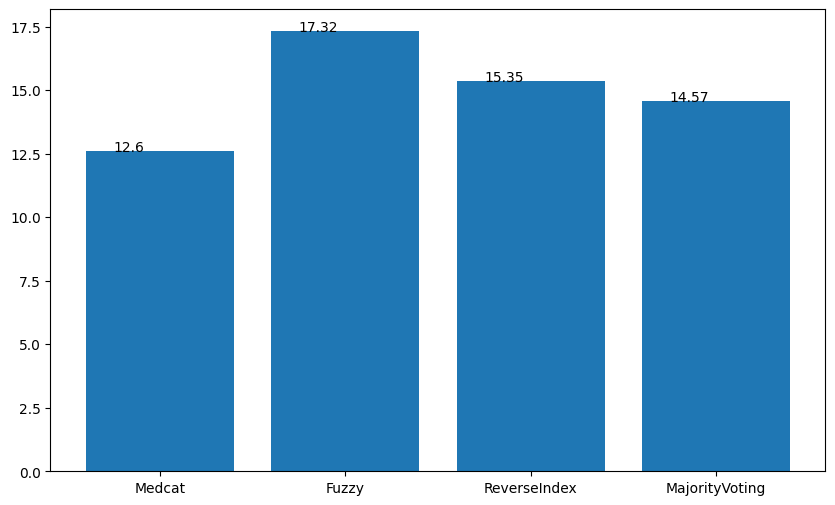

In [115]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [matchingMedcatPercentage, matchingFuzzyPercentage, matchingReverseIndexPercentage, matchingmajorityVotingPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot not matching percentages

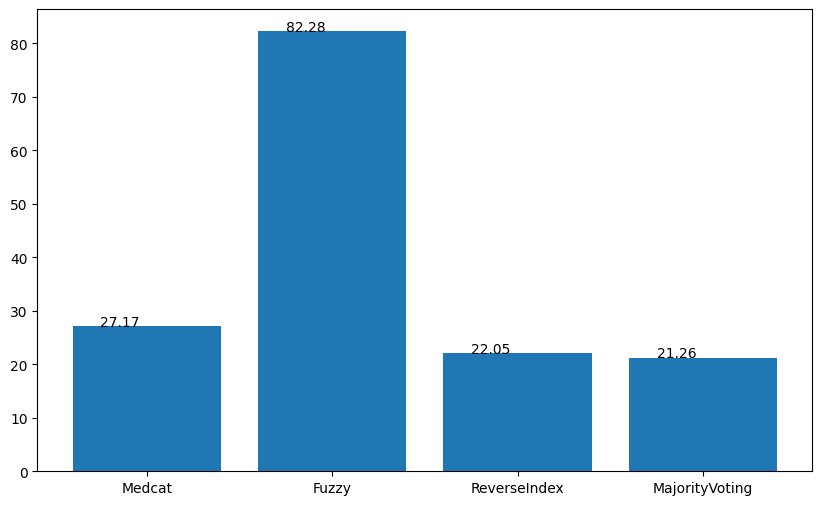

In [116]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [notMatchingMedcatPercentage, notMatchingFuzzyPercentage, notMatchingReverseIndexPercentage, notMatchingmajorityVotingPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

## Illness

### Read standard concepts

In [117]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
illnessDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
illnessDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271659,3663266,Presenting part of fetus not engaged,Condition,SNOMED,Clinical Finding,S,871478009,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN
3271672,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN


### Read illness file

In [118]:
import pandas as pd

sourceIllnessDf = pd.read_csv('data/20002_non-cancer_illness.csv', dtype=str)
sourceIllnessDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,1604396402676,201820,VALUE,NaN,Vaclav,1604396395977
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,1604397104088,4071876,VALUE,NaN,<auto>,1604359804705
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,1604404677075,4129177,VALUE,NaN,Vaclav,1604404675001
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,1604361691699,256450,VALUE,NaN,<auto>,1604359804727
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,1604361697782,4236898,VALUE,NaN,<auto>,1604359804809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,1604395600509,433527,VALUE,NaN,<auto>,1604359879127
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,1604417223795,374923,VALUE,NaN,<auto>,1604359879335
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,1604395603304,201909,VALUE,NaN,<auto>,1604359879718
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,1604395604447,198197,VALUE,NaN,<auto>,1604359880370


### Read mapped illness file

In [120]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp/'
mappedIllnessDf = pd.read_csv(baseDir + '20002_non-cancer_illness_mapped.csv')
mappedIllnessDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence,id
0,0,diabetes,NaN,Skin ulcer due to type 2 diabetes mellitus,Diabetic neuropathy &/or diabetic polyneuropathy,NaN,Low,1220
1,1,diabetes,NaN,Skin ulcer due to type 2 diabetes mellitus,Diabetic neuropathy &/or diabetic polyneuropathy,Skin ulcer due to type 2 diabetes mellitus,Low,1220
2,2,diabetes,NaN,Skin ulcer due to type 2 diabetes mellitus,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetic neuropathy &/or diabetic polyneuropathy,Low,1220
3,3,fracture hand,NaN,Open fracture of shaft of metacarpal bone of r...,Fracture of hand,NaN,Low,1638
4,4,fracture hand,NaN,Open fracture of shaft of metacarpal bone of r...,Fracture of hand,Open fracture of shaft of metacarpal bone of r...,Low,1638
...,...,...,...,...,...,...,...,...
1094,1094,male infertility,Male Infertility,Male,Male infertility,Male Infertility,Low,1404
1095,1095,male infertility,Male Infertility,Male,Male infertility,Male,Low,1404
1096,1096,male infertility,Male Infertility,Male,Male infertility,Male infertility,Low,1404
1097,1097,other renal/kidney problem,Problem,Problem,NaN,Problem,Medium,1405


### Analyse mapped illness file

In [121]:
mappedIllnessDf.confidence.value_counts()

Low       869
Medium    224
High        6
Name: confidence, dtype: int64

In [122]:
len(mappedIllnessDf.id.unique())

445

In [123]:
mappedIllnessDf[mappedIllnessDf.confidence.isin(['Medium', 'High'])]

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence,id
9,9,asbestosis,Asbestosis,(Asbestosis) or (byssinosis) or (pleural plaqu...,Asbestosis,Asbestosis,Medium,1120
11,11,haemophilia,Hemophilia,Hemophilia,NaN,Hemophilia,Medium,1328
22,22,grave's disease,Disease,Disease,Graves' disease,Disease,Medium,1522
24,24,cervical problem,Problem,Cervical incompetence with antenatal problem,Cervical incompetence with antenatal problem,Cervical incompetence with antenatal problem,Medium,1553
26,26,dermatomyositis,Dermatomyositis,Childhood type dermatomyositis,Dermatomyositis,Dermatomyositis,Medium,1480
...,...,...,...,...,...,...,...,...
1068,1068,pericardial problem,Problem,Problem,NaN,Problem,Medium,1080
1070,1070,meningitis,Meningitis,Herpes zoster with meningitis,Meningitis,Meningitis,Medium,1247
1075,1075,spinal abscess,Abscess,Abscess,Spinal subdural abscess,Abscess,Medium,1248
1083,1083,cranial nerve problem/palsy,Problem,Problem,NaN,Problem,Medium,1249


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

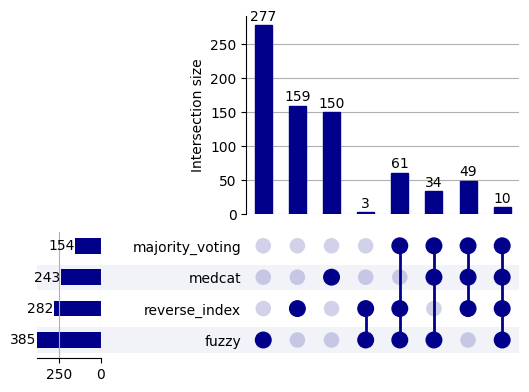

In [124]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedIllnessDf.medcatConcept)
mappedIdsFuzzy = set(mappedIllnessDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedIllnessDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedIllnessDf[mappedIllnessDf.confidence.isin(['Medium', 'High'])].majorityVoting)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Create final dataframe

In [125]:
mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['id'])['id', 'medcatConcept'].agg(['unique'])
mappedIllnessMedcatDf.reset_index(drop = True, inplace = True)
mappedIllnessMedcatDf.columns = mappedIllnessMedcatDf.columns.droplevel(1)
mappedIllnessMedcatDf.medcatConcept = mappedIllnessMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedIllnessMedcatDf.id = mappedIllnessMedcatDf.id.apply(lambda x: str(x[0]))
mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['id'])['id', 'fuzzyConcept'].agg(['unique'])
mappedIllnessFuzzyDf.reset_index(drop = True, inplace = True)
mappedIllnessFuzzyDf.columns = mappedIllnessFuzzyDf.columns.droplevel(1)
mappedIllnessFuzzyDf.fuzzyConcept = mappedIllnessFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedIllnessFuzzyDf.id = mappedIllnessFuzzyDf.id.apply(lambda x: str(x[0]))
mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['id'])['id', 'reverseIndexConcept'].agg(['unique'])
mappedIllnessReverseIndexDf.reset_index(drop = True, inplace = True)
mappedIllnessReverseIndexDf.columns = mappedIllnessReverseIndexDf.columns.droplevel(1)
mappedIllnessReverseIndexDf.reverseIndexConcept = mappedIllnessReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedIllnessReverseIndexDf.id = mappedIllnessReverseIndexDf.id.apply(lambda x: str(x[0]))
mappedIllnessMajorityVotingDf = mappedIllnessDf[mappedIllnessDf.majorityVoting.notna() & mappedIllnessDf.confidence.isin(['Medium', 'High'])].groupby(['id'])['id', 'majorityVoting'].agg(['unique'])
mappedIllnessMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedIllnessMajorityVotingDf.columns = mappedIllnessMajorityVotingDf.columns.droplevel(1)
mappedIllnessMajorityVotingDf.majorityVoting = mappedIllnessMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedIllnessMajorityVotingDf.id = mappedIllnessMajorityVotingDf.id.apply(lambda x: str(x[0]))

/tmp/ipykernel_3343692/2408770577.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['id'])['id', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_3343692/2408770577.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['id'])['id', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_3343692/2408770577.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['id'])['id', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_3343692/2408770577.py:16: FutureWarning: Indexing with multiple ke

In [127]:
mappedIllnessCuratedDf = sourceIllnessDf\
    .merge(illnessDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceValueCode', 'concept_name']]
mappedIllnessCuratedDf = mappedIllnessCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedIllnessCuratedDf

,sourceValueCode,curatedConcept
0,1220,Diabetes mellitus
1,1638,Fracture of hand
2,1552,Uterus problem
3,1120,Asbestosis
4,1328,Hemophilia
...,...,...
441,1402,Endometriosis (clinical)
442,1250,Bell's palsy
443,1403,Female infertility
444,1404,Male infertility


In [128]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedIllnessFinalDf = mappedIllnessCuratedDf\
    .merge(mappedIllnessMedcatDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])\
        .merge(mappedIllnessFuzzyDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])\
            .merge(mappedIllnessReverseIndexDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])\
                .merge(mappedIllnessMajorityVotingDf, how='left', left_on='sourceValueCode', right_on='id').drop(columns=['id'])
mappedIllnessFinalDf

,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,1220,Diabetes mellitus,NaN,Skin ulcer due to type 2 diabetes mellitus,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,1638,Fracture of hand,NaN,Open fracture of shaft of metacarpal bone of r...,Fracture of hand,NaN
2,1552,Uterus problem,Problem,Uterine scar from previous surgery in pregnanc...,Uterine contractions problem,NaN
3,1120,Asbestosis,Asbestosis,(Asbestosis) or (byssinosis) or (pleural plaqu...,Asbestosis,Asbestosis
4,1328,Hemophilia,Hemophilia,Hemophilia,NaN,Hemophilia
...,...,...,...,...,...,...
441,1402,Endometriosis (clinical),NaN,Endometriosis of broad ligament,Endometriosis,NaN
442,1250,Bell's palsy,Bell S Palsy,Bell's palsy,NaN,NaN
443,1403,Female infertility,Female Infertility,Female infertility associated with anovulation,Female infertility,NaN
444,1404,Male infertility,Male Infertility,Male,Male infertility,NaN


### Plot the output of all the mapping strategies

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

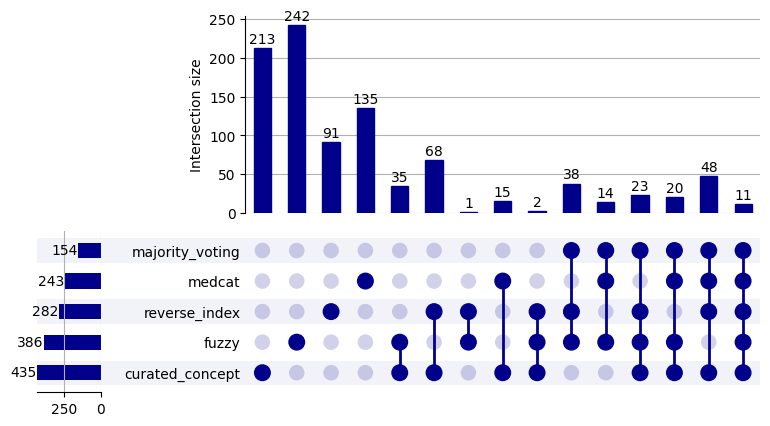

In [129]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedIllnessFinalDf.medcatConcept)
mappedIdsFuzzy = set(mappedIllnessFinalDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedIllnessFinalDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedIllnessFinalDf.majorityVoting)
mappedIdsCurated = set(mappedIllnessFinalDf.curatedConcept)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        , 'curated_concept': mappedIdsCurated
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Calculate matching and not matching percentages

In [130]:
matchingMedcatPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.medcatConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
matchingFuzzyPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.fuzzyConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
matchingReverseIndexPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.reverseIndexConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
matchingmajorityVotingPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.majorityVoting].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingMedcatPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.medcatConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingFuzzyPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.fuzzyConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.fuzzyConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingReverseIndexPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.reverseIndexConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.reverseIndexConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)
notMatchingmajorityVotingPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.majorityVoting.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.majorityVoting)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2)

### Plot matching percentages

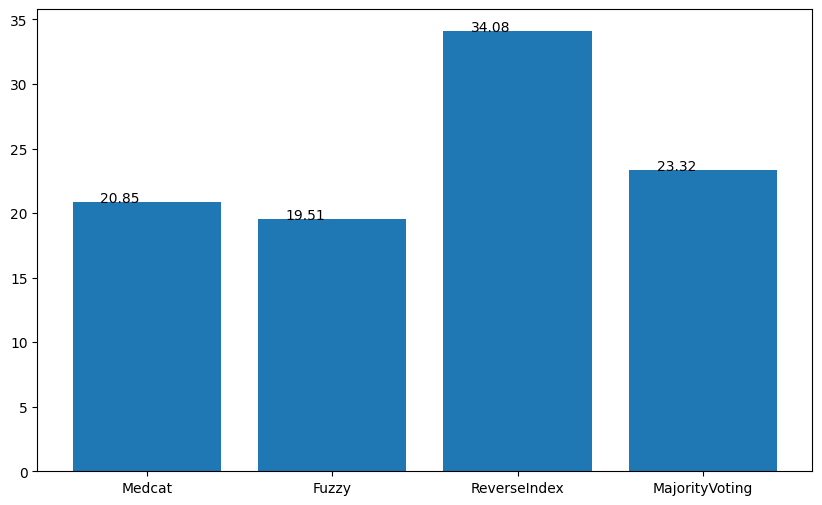

In [131]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [matchingMedcatPercentage, matchingFuzzyPercentage, matchingReverseIndexPercentage, matchingmajorityVotingPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot not matching percentages

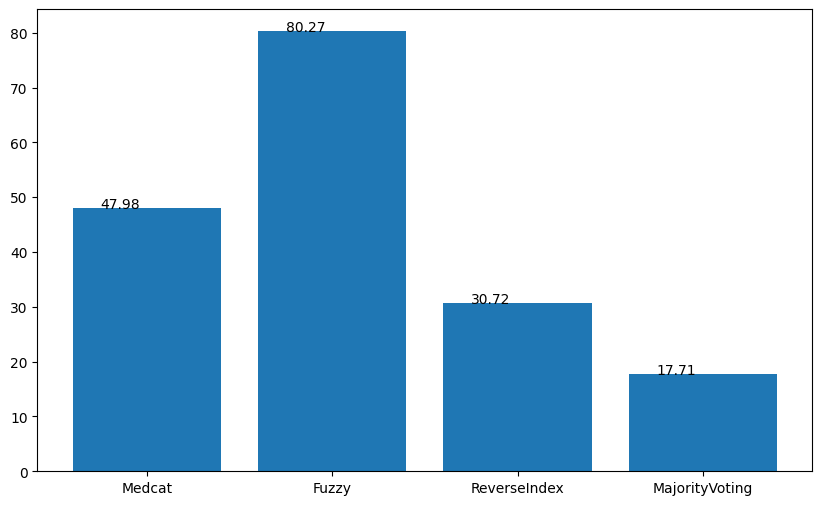

In [132]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [notMatchingMedcatPercentage, notMatchingFuzzyPercentage, notMatchingReverseIndexPercentage, notMatchingmajorityVotingPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))